---
title: Timor Leste Model Rollout Part 1 (Compute Per-country Populated Grids) 
format:
  html:
    code-fold: false
---

### Import packages

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append("../../")
from relativewealth.rollout_grids import get_region_filtered_bingtile_grids 
import geopandas as gpd


### Set global parameters


In [4]:
REGION = 'timor-leste'
ADMIN_LVL = 'ADM2'

### Generate/Cache/Get per country grids

In [5]:
get_region_filtered_bingtile_grids?

Signature:
get_region_filtered_bingtile_grids(
    region: str,
    admin_lvl='ADM2',
    quadkey_lvl=14,
    use_cache=True,
    cache_dir='~/.cache/geowrangler',
    filter_population=True,
    assign_grid_admin_area=True,
    metric_crs='epsg:3857',
    extra_args={'nodata': nan},
) -> geopandas.geodataframe.GeoDataFrame
Docstring:
Get a geodataframe consisting of bing tile grids for a region/country at a quadkey level.
By default, the grids are filtered by population
Arguments:
   region: (required) the country/region for which grids will be created
   admin_lvl: (default: ADM2) the administrative level boundaries used for assigning the grids
   quadkey_lvl: (default: 14) the bingtile grid size zoom level 
   use_cache: (default: True) whether to use a cached version or overwrite existing file
   cache_dir: (default: '~/.cache/geowrangler') directory where grids geojson will be created
   filter_population: (default: True) - whether to filter out grids with zero population counts
 

In [6]:
admin_grids_gdf = get_region_filtered_bingtile_grids(REGION, admin_lvl=ADMIN_LVL, use_cache)

2023-02-23 15:45:53.162 | INFO     | relativewealth.rollout_grids:get_region_filtered_bingtile_grids:60 - Regenerating grids file /home/butchtm/.cache/geowrangler/quadkey_grids/timor-leste_14_populated_admin_grids.geojson
2023-02-23 15:45:53.164 | DEBUG    | relativewealth.rollout_grids:get_region_filtered_bingtile_grids:62 - Loading boundaries for region timor-leste and admin level ADM2
2023-02-23 15:45:54.286 | INFO     | relativewealth.rollout_grids:get_region_filtered_bingtile_grids:66 - Generating grids for region timor-leste and admin level ADM2 at quadkey level 14


2023-02-23 15:45:56.210 | INFO     | relativewealth.rollout_grids:get_region_filtered_bingtile_grids:70 - Generated 2811 grids for region timor-leste and admin level ADM2 at quadkey level 14
2023-02-23 15:45:56.212 | INFO     | relativewealth.rollout_grids:get_region_filtered_bingtile_grids:74 - Assigning grids to admin areas using metric crs epsg:3857
2023-02-23 15:45:57.087 | INFO     | relativewealth.rollout_grids:get_region_filtered_bingtile_grids:78 - Getting timor-leste population data for filtering grids
2023-02-23 15:45:58.600 | INFO     | relativewealth.rollout_grids:get_region_filtered_bingtile_grids:80 - Computing population zonal stats per grid
2023-02-23 15:46:18.871 | INFO     | relativewealth.rollout_grids:get_region_filtered_bingtile_grids:87 - Filtering unpopulated grids based on population data
2023-02-23 15:46:18.877 | INFO     | relativewealth.rollout_grids:get_region_filtered_bingtile_grids:90 - Filtered admin grid count: 2024
/home/butchtm/work/povmap/fresh-povmap

### Explore per country populated grids

<AxesSubplot: >

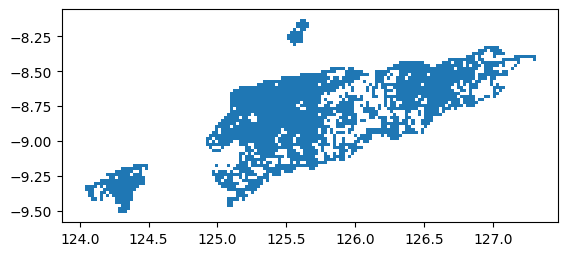

In [7]:
# admin_grids_gdf.explore()
admin_grids_gdf.plot()


In [8]:
admin_grids_gdf.columns

Index(['geometry', 'quadkey', 'shapeName', 'shapeISO', 'shapeID', 'shapeGroup',
       'shapeType', 'pop_count'],
      dtype='object')

In [9]:
admin_grids_gdf.head()

,geometry,quadkey,shapeName,shapeISO,shapeID,shapeGroup,shapeType,pop_count
0,"POLYGON ((124.03564 -9.34067, 124.03564 -9.318...",31011220203121,Nitibe,None,TLS-ADM2-3_0_0-B58,TLS,ADM2,102.251936
1,"POLYGON ((124.03564 -9.36235, 124.03564 -9.340...",31011220203123,Nitibe,None,TLS-ADM2-3_0_0-B58,TLS,ADM2,992.492772
2,"POLYGON ((124.05762 -9.34067, 124.05762 -9.318...",31011220203130,Nitibe,None,TLS-ADM2-3_0_0-B58,TLS,ADM2,118.897600
3,"POLYGON ((124.05762 -9.36235, 124.05762 -9.340...",31011220203132,Nitibe,None,TLS-ADM2-3_0_0-B58,TLS,ADM2,513.637632
4,"POLYGON ((124.05762 -9.38403, 124.05762 -9.362...",31011220203310,Nitibe,None,TLS-ADM2-3_0_0-B58,TLS,ADM2,319.140940


In [10]:
admin_grids_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2024 entries, 0 to 2810
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    2024 non-null   geometry
 1   quadkey     2024 non-null   object  
 2   shapeName   2024 non-null   object  
 3   shapeISO    2024 non-null   object  
 4   shapeID     2024 non-null   object  
 5   shapeGroup  2024 non-null   object  
 6   shapeType   2024 non-null   object  
 7   pop_count   2024 non-null   float64 
dtypes: float64(1), geometry(1), object(6)
memory usage: 142.3+ KB
